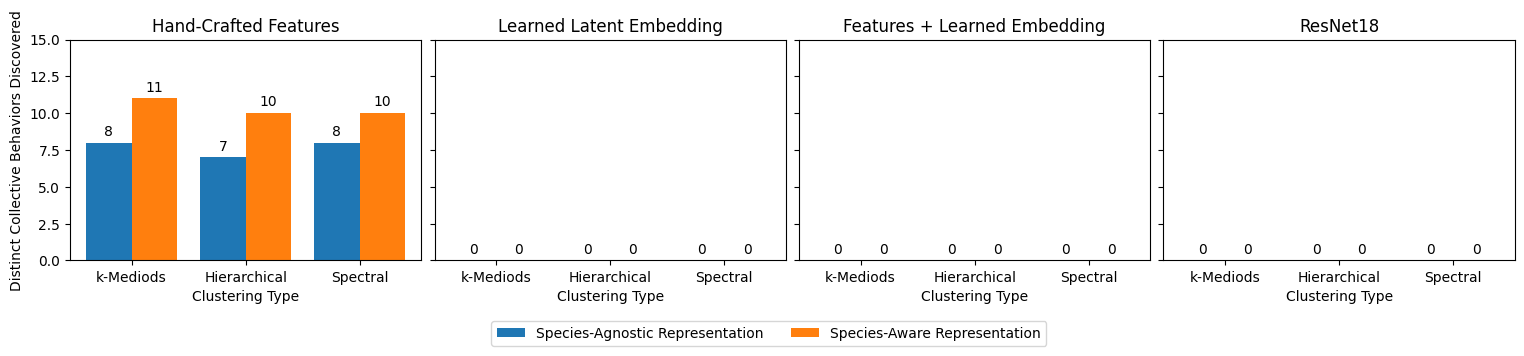

In [42]:
import matplotlib.pyplot as plt
import numpy as np

experiments = ["Hand-Crafted Features", "Learned Latent Embedding", "Features + Learned Embedding", "ResNet18"]
species = ("k-Mediods", "Hierarchical", "Spectral")
penguin_means = {
    'Species-Agnostic Representation': [
        (8, 7, 8),
        (0, 0, 0),
        (0, 0, 0),
        (0, 0, 0),
    ],
    'Species-Aware Representation': [
        (11, 10, 10),
        (0, 0, 0),
        (0, 0, 0),
        (0, 0, 0),
    ],
}

x = np.arange(len(species))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(1, 4, layout='constrained', sharey=True)
fig.set_figwidth(15)
fig.set_figheight(3)

for i in range(4):
    multiplier = 0
    for attribute, measurement in penguin_means.items():
        offset = width * multiplier + (width / 2)
        rects = ax[i].bar(x + offset, measurement[i], width, label=attribute)
        ax[i].bar_label(rects, padding=3)
        multiplier += 1

        # ax[i].set_ylabel('Length (mm)')
        ax[i].set_title(experiments[i])
        ax[i].set_xticks(x + width, species)
        ax[i].set_xlabel("Clustering Type")

        ax[i].set_ylim(0, 15)

def legend_without_duplicate_labels(fig, ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    fig.legend(*zip(*unique), loc='lower center', ncol=2, bbox_to_anchor=(0.5,-0.15))

ax[0].set_ylabel("Distinct Collective Behaviors Discovered")
legend_without_duplicate_labels(fig, ax[0])
plt.show()